## 공통코드

In [1]:
import sys
# sklearn ≥0.20 필수
import sklearn
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "natural_language_processing"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
import warnings
warnings.filterwarnings(action='ignore')

### 네이버 지식인 데이터를 크롤링해서 단어 추천

In [3]:
from bs4 import BeautifulSoup

import time
import requests
from tqdm import tqdm_notebook

textlist = []

html = 'https://search.naver.com/search.naver?where=kin&sm=tab_jum&ie=utf8&query=황선홍&start='
for n in range(1, 1000, 10):
    response = requests.get(html + str(n))
    try :
        
        #print(response) #문제 발생
        soup = BeautifulSoup(response.text, "html.parser")
        tmp = soup.select('div.question_area > div.question_group > a')
        for line in tmp:
            #print(line.text)
            textlist.append(line.text)
        
        
    except :
        print("예외 발생")
    time.sleep(0.5)    
print(textlist)

KeyboardInterrupt: 

In [27]:
# 형태소 분석
import nltk
from konlpy.tag import Okt
okt = Okt() 
# 한글 형태소 분석기는 하나의 문장에만 가능하므로 list 의 데이터를 하나의 문장으로 변경
present_text = ''
for line in textlist:
    present_text = present_text + line + '\n'

tokens_ko = okt.morphs(present_text)
print(tokens_ko)

['토트넘', '풀럼', '중계', '무료', '시청', '되나요', '?', '손흥민', '골', '넣을까요', '?', '토트넘', '풀럼', '중계', '무료', '로', '볼', '수', '있나요', '?', '손흥민', '골', '넣을까요', '?', '아직', '이번', '시즌', '첫', '골', '이', '없어서', '걱정', '이네', '요', '\n', '손흥민', 'vs', '이강인', '손흥민', '<', '이강인', '이', '맞죠', '?', '이건', '당연히', '이강인', '이', '더', '잘', '하죠', '?', '\n', '손흥민', '중계', '폰', '으로', '보려구요', '손흥민', '중계', '어떻', '게', '들', '보시나요', '?', '그', '전', '에는', '손흥민', '중계', '를', '보던', '곳', '이', '있었는데', '끊기는', '것', '도', '심하고', '도저히', '집중', '이', '안되더라구요', 'ㅠㅠ', '글', '서', '이참', '에', '손흥민', '중계', '깔', '끔', '쓰하게', '볼', '수', '있는', '곳', '으로', '찾고', '있는데요', '.', '손흥민', '중계', '보려면', '어떻게', '알아봐야', '하나요', '?', '벌써', '부터', '기대', '가', '됩니다', 'ㅎㅎ', '\n', '손흥민', 'vs', '호나우지뉴', '솔직히', '손흥민', '이', '우위', '아닌가요', '?', '꾸준했던건', '손흥민', '인', '디', '\n', '손흥민', 'vs', '카가와', 'vs', '박지성', '...', '호날두', '홀란드', '메시', '샬', '라', '이런', '선수', '들', '은', '전부', '선정', '되어있던데', '카가와', '신지', '랑', '김민재', '도', '있더라구요', '근데', '아무리', '찾아봐도', '케인', '하고', '손흥민', '이', '없던데', '.', '그렇게', 

In [28]:
# 형태소 분석된 결과를 숫자로 변경
ko = nltk.Text(tokens_ko, name='손흥민')
print(ko.vocab().most_common(100))

[('손흥민', 28), ('이', 16), ('?', 14), ('\n', 8), ('중계', 7), ('골', 7), ('vs', 7), ('...', 5), ('토트넘', 4), ('으로', 4), ('.', 4), ('있나요', 3), ('이강인', 3), ('도', 3), ('선수', 3), ('월드컵', 3), ('풀럼', 2), ('무료', 2), ('넣을까요', 2), ('볼', 2), ('수', 2), ('이번', 2), ('요', 2), ('게', 2), ('들', 2), ('곳', 2), ('에', 2), ('어떻게', 2), ('가', 2), ('카가와', 2), ('박지성', 2), ('은', 2), ('전부', 2), ('랑', 2), ('케인', 2), ('가요', 2), ('비교', 2), ('평가', 2), ('국', 2), ('대', 2), ('는', 2), ('시청', 1), ('되나요', 1), ('로', 1), ('아직', 1), ('시즌', 1), ('첫', 1), ('없어서', 1), ('걱정', 1), ('이네', 1), ('<', 1), ('맞죠', 1), ('이건', 1), ('당연히', 1), ('더', 1), ('잘', 1), ('하죠', 1), ('폰', 1), ('보려구요', 1), ('어떻', 1), ('보시나요', 1), ('그', 1), ('전', 1), ('에는', 1), ('를', 1), ('보던', 1), ('있었는데', 1), ('끊기는', 1), ('것', 1), ('심하고', 1), ('도저히', 1), ('집중', 1), ('안되더라구요', 1), ('ㅠㅠ', 1), ('글', 1), ('서', 1), ('이참', 1), ('깔', 1), ('끔', 1), ('쓰하게', 1), ('있는', 1), ('찾고', 1), ('있는데요', 1), ('보려면', 1), ('알아봐야', 1), ('하나요', 1), ('벌써', 1), ('부터', 1), ('기대', 1), ('됩니다', 1), ('ㅎ

In [31]:
# 불필요하게 많이 등장하는 텍스트를 제거(stopwords)
stop_words = ['?', '\n', '...', '.']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name='손흥민')
ko.vocab().most_common(100)


[('손흥민', 28),
 ('이', 16),
 ('중계', 7),
 ('골', 7),
 ('vs', 7),
 ('토트넘', 4),
 ('으로', 4),
 ('있나요', 3),
 ('이강인', 3),
 ('도', 3),
 ('선수', 3),
 ('월드컵', 3),
 ('풀럼', 2),
 ('무료', 2),
 ('넣을까요', 2),
 ('볼', 2),
 ('수', 2),
 ('이번', 2),
 ('요', 2),
 ('게', 2),
 ('들', 2),
 ('곳', 2),
 ('에', 2),
 ('어떻게', 2),
 ('가', 2),
 ('카가와', 2),
 ('박지성', 2),
 ('은', 2),
 ('전부', 2),
 ('랑', 2),
 ('케인', 2),
 ('가요', 2),
 ('비교', 2),
 ('평가', 2),
 ('국', 2),
 ('대', 2),
 ('는', 2),
 ('시청', 1),
 ('되나요', 1),
 ('로', 1),
 ('아직', 1),
 ('시즌', 1),
 ('첫', 1),
 ('없어서', 1),
 ('걱정', 1),
 ('이네', 1),
 ('<', 1),
 ('맞죠', 1),
 ('이건', 1),
 ('당연히', 1),
 ('더', 1),
 ('잘', 1),
 ('하죠', 1),
 ('폰', 1),
 ('보려구요', 1),
 ('어떻', 1),
 ('보시나요', 1),
 ('그', 1),
 ('전', 1),
 ('에는', 1),
 ('를', 1),
 ('보던', 1),
 ('있었는데', 1),
 ('끊기는', 1),
 ('것', 1),
 ('심하고', 1),
 ('도저히', 1),
 ('집중', 1),
 ('안되더라구요', 1),
 ('ㅠㅠ', 1),
 ('글', 1),
 ('서', 1),
 ('이참', 1),
 ('깔', 1),
 ('끔', 1),
 ('쓰하게', 1),
 ('있는', 1),
 ('찾고', 1),
 ('있는데요', 1),
 ('보려면', 1),
 ('알아봐야', 1),
 ('하나요', 1),
 ('벌써', 1),

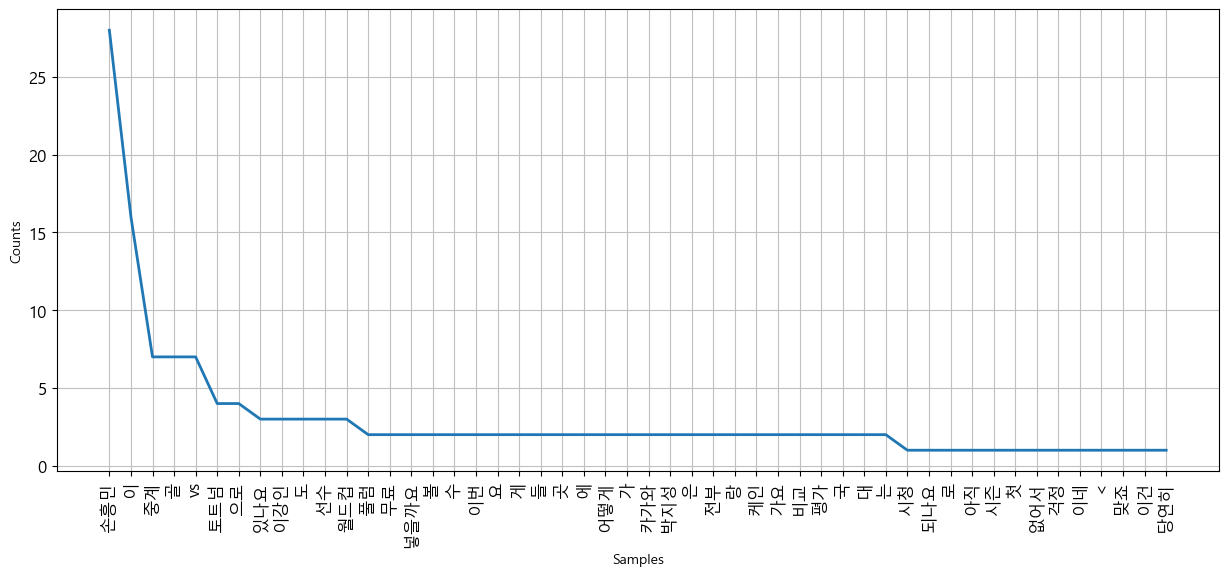

In [32]:
# 단어 별 등장 횟수 시각화
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

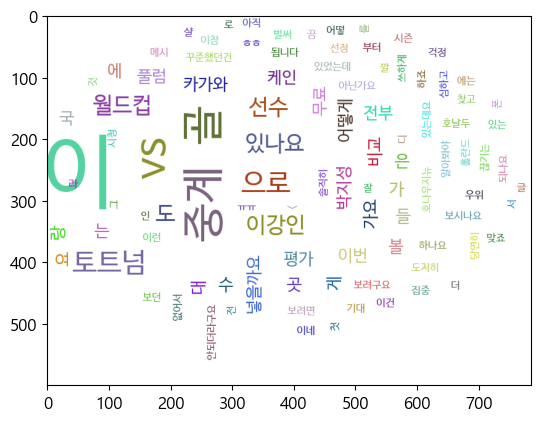

In [37]:
# 워드클라우드 생성
import pytagcloud

# 자주 등장하는 단어 추출
data = ko.vocab().most_common(101)
# 단어와 등장 횟수를 가지고 크기와 색상을 설정
taglist = pytagcloud.make_tags(data, maxsize=200)
# print(taglist)
for i in taglist:
    if i["tag"] == '손흥민':
        taglist.remove(i)

#태그 클라우드 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.png', size=(900, 600), fontname='Korean', rectangular=False)

import matplotlib.pyplot
import matplotlib.image
img = matplotlib.image.imread('wordcloud.png')
imgplot = matplotlib.pyplot.imshow(img)
matplotlib.pyplot.show()

In [40]:
# 연관 단어 추출
# !pip install gensim
from gensim.models import word2vec

lines = present_text
okt = Okt()
results = []

for line in lines:
    # 품사를 가지고 와서 Josa, Eomi, Punctuation 을 제거
    malist = okt.pos(line, norm=True, stem=True)
    r = []
    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)


토
트
넘다

풀
럼

중
계

무
료

시
청

되다
나
요


손
흥
민

골

넣다

끄다
요


토
트
넘다

풀
럼

중
계

무
료
로

볼

수

있다
나
요


손
흥
민

골

넣다

끄다
요


아
직

이
번

시
즌

첫
골
이

없다

서다

걱
정
이
네
요

손
흥
민

v
s

이
강
인

손
흥
민



이
강
인
이

맞다



이
건

당
연
히

이
강
인
이

더

자다
하



손
흥
민
중
계

폰
으
로

보
려
구
요

손
흥
민
중
계


떻
게
들다

보
시
나
요



그

전

늘다

손
흥
민
중
계
를

보
던

곳
이

있다
었
늘다
데

끊다
기
늘다

것
도

심
하
고

도
저
히

집
중
이

안
되다
더

구
요
ㅠ
ㅠ

글
서다

이
차다


손
흥
민
중
계

깔다
끄다
쓰다
하
게

볼

수

있다
늘다

곳
으
로

찾다
고

있다
늘다
데
요


손
흥
민
중
계

보
려
면


떻
게

알
아
보다
야

하
나
요


벌
써다
부
터

기
대다
가다

되다
니
다

ㅎ
ㅎ

손
흥
민

v
s

호
나
우
지다
뉴

솔
직
히

손
흥
민
이

우
위
아
닌
가다
요


꾸다
준
하다
던
건

손
흥
민
인
디

손
흥
민

v
s

카
가다
오다

v
s

박
지다
성





호
날
두

홀
란
드

메
시

샬


이
런

선
수
들다
은

전
부

선
정
되다

있다
던
데

카
가다
오다

신
지다


김
민
재
도

있다
더

구
요

근
데

아
무
리

찾다
아
보다
도

케
인

하
고

손
흥
민
이

없다
던
데


그
렇
게

골

많다
이

넣다
고
도



E
S
M

오다
해
의

팀






이
게

중
요
하다
건
가다
요


그
리
고

객
관
적
으
로

비
교
좀

해
주
세
요

해
외

평
가다

네
티
즌

평
가다

전
부

포
함
하다

때





손
흥
민

월
드
컵

1


손
흥
민

선
수
가다

2
0
2
6

월
드
컵

뛰

In [60]:
data_file = 'Son.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))
    data = word2vec.LineSentence(data_file)

model = word2vec.Word2Vec(data, vector_size=200, window=10,
hs=1,min_count=2, sg=1)
model.save('Son.model')
model = word2vec.Word2Vec.load("Son.model")
model.wv.most_similar(positive=['컵'])

[('렇', 0.17938785254955292),
 ('월', 0.13930967450141907),
 ('풀', 0.13916337490081787),
 ('건', 0.13429564237594604),
 ('직', 0.1317596733570099),
 ('고', 0.12280555814504623),
 ('민', 0.11061125248670578),
 ('전', 0.10829358547925949),
 ('연', 0.10238903760910034),
 ('네', 0.09987125545740128)]

### tweet_temp.csv 파일의 내용을 읽어서 손흥민 관련 연관 규칙 분석

In [62]:
df = pd.read_csv("./data/tweet_temp.csv")
df.head()

,created,tweet_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...


In [63]:
# 한글만 추출
import re
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    # 한글이 아닌 것은 전부 '' 로 치환
    result = hangul.sub('', text)
    return result

# ‘tweet_text’ 피처에 이를 적용
df['ko_text'] = df['tweet_text'].apply(lambda x: text_cleaning(x))
df.head()

,created,tweet_text,ko_text
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...


In [70]:
# 한글 형태소 분석
from konlpy.tag import Okt
from collections import Counter
# 한국어 약식 불용어사전 예시 파일 - https://www.ranks.nl/stopwords/korean
korean_stopwords_path = "./data/stopwords.txt"
with open(korean_stopwords_path, encoding='utf8') as f: stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
# print(stopwords)

def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    # 한글자 키워드를 제거
    nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어를 제거
    nouns = [noun for noun in nouns if noun not in stopwords]
    return nouns

df['nouns'] = df['ko_text'].apply(lambda x: get_nouns(x))
df.head()

,created,tweet_text,ko_text,nouns
0,2019-04-01 10:55:00,Legends At New Spurs Stadium\nTottenham Hotspu...,,[]
1,2019-04-01 10:52:30,"RT @PerSON7a: TS트릴리온, 축구국가대표 손흥민 선수 TS샴푸 모델로 기...",트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처 한국경제 네이버 뉴스,"[트릴, 리온, 축구, 국가대표, 손흥민, 선수, 샴푸, 모델, 기용, 출처, 한국..."
2,2019-04-01 10:49:33,RT @SON78PAY019: 손흥민이 이쁘지~ 깐 밤같애~\n\nㅋㅋㅋㅋㅋㅋㅋㅋㅋ...,손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 ...,"[손흥민, 말씀]"
3,2019-04-01 10:49:03,귀여워💜 #손흥민 https://t.co/hstR1vALAf,귀여워 손흥민,[손흥민]
4,2019-04-01 10:45:26,RT @mediatodaynews: 경남도민일보 “(프로축구연맹은) 경기장 안에서 ...,경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 ...,"[경남, 도민, 일보, 프로축구, 연맹, 경기장, 선거운동, 손흥민, 영국, 관중,..."


### 연관 규칙 분석 API 사용

In [72]:
pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5975 sha256=28bda3fcb0cc852cd968b286e0cafc32c131059067769ab9c63c2027b6cccf68
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c4\1a\79\20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [73]:
# 거래 생성
transactions = [['손흥민', '시소코'],['손흥민', '케인'],
                ['손흥민', '케인', '포체티노']]

# 연관 분석을 수행
from apyori import apriori
results = list(apriori(transactions))
for result in results:
    print(result)

RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'시소코'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'포체티노'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'포체티노'}), confidence=0.3333333333333333, lift=1.0)])
RelationRecord(items=frozenset({'시소코', '손흥민'}), support=0.3333333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'시소코', '손흥민'}), confidence=0.3333333333333333, lift=1.0), Or

In [74]:
# 지지도 0.5 이상, 신뢰도 0.6 이상, 향상도 1.0 이상인 거래만 확인
results = list(apriori(transactions, min_support=0.5, min_confidence=0.6,
             min_lift=1.0, max_length=2))

for result in results:
    print(result)


RelationRecord(items=frozenset({'손흥민'}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])
RelationRecord(items=frozenset({'케인'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0)])
RelationRecord(items=frozenset({'케인', '손흥민'}), support=0.6666666666666666, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'케인', '손흥민'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'손흥민'}), items_add=frozenset({'케인'}), confidence=0.6666666666666666, lift=1.0), OrderedStatistic(items_base=frozenset({'케인'}), items_add=frozenset({'손흥민'}), confidence=1.0, lift=1.0)])


In [77]:
# 데이터 프레임의 데이터를 list 로 변환
transactions = df['nouns'].tolist()
transactions = [transaction for transaction in transactions if transaction] # 공백 문자열을 방지
results = list(apriori(transactions, min_support=0.1, min_confidence=0.2,
                       min_lift=5, max_length=2))
for result in results:
    print(result)

RelationRecord(items=frozenset({'국가대표팀', '게임'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'국가대표팀'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'국가대표팀'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'게임', '금메달'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'금메달'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'금메달'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'게임', '모습'}), support=0.14285714285714285, ordered_statistics=[OrderedStatistic(items_base=frozenset({'게임'}), items_add=frozenset({'모습'}), confidence=1.0, lift=7.0), OrderedStatistic(items_base=frozenset({'모습'}), items_add=frozenset({'게임'}), confidence=1.0, lift=7.0)])
RelationRecord(items=frozenset({'아시아', '게임'}), support=0.14285714285714285, ordere

In [79]:
# 결과를 DataFrame 으로 변환 - 1개의 상품의 경우는 제거
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        # 결과의 item 이름을 가지고 와서 list 로 생성
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        # 시리즈로 변환
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,국가대표팀,게임,0.142857
1,게임,금메달,0.142857
2,게임,모습,0.142857
3,아시아,게임,0.142857
4,게임,의조,0.142857


### 네트워크 시각화

In [80]:
tweet_corpus = "".join(df['ko_text'].tolist())
print(tweet_corpus)
network_df.head()

             트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 귀여워 손흥민   경남도민일보 프로축구연맹은 경기장 안에서 선거운동을 하는 것은 손흥민에게 영국 관중이 인종차별 행위를 한 것과 같은 급으로 보고 있다 그만큼 축구장 내 선거운동 규정 위반이 엄격하다는 이야기인데요 내가 선택을 받지 않았더라면 손흥민보다 축구를 잘했었을까안녕하세요 토트넘 골수팬 렙 승부사입니다 제일 좋아하는 선수는 손흥민입다   계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간  안녕하십니까 손흥민입니다 오랜만에 트위터에 들어오니 매우 어색하네요오늘 경기도 많은 관심 부탁드립니다  계정지기 실수로 삭제해버려서 다시 올리는  하리보 손흥민 홍보모델 발탁 기념해당글  하신 분들 중 추첨을 통해 분에게 하리보 골드바렌 을 통씩 드립니다 기간   출국손흥민    출국손흥민   한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요 한국축구국가대표팀 조현우 손흥민 황의조선수  아시아게임에서 금메달받고 조현우 손흥민 황의조 입에다 금메달물고있는 모습 의조야 진짜 남자답고 넘넘 잘생겼어요    긴급속보 하리보 신제품이 나온다고 손흥민 이 개시하는 하리보 신제품 썬샤인을 가장 먼저 받아보고 싶다면 팔로우 하고 알림 설정까지 해두기하리보 신제품              트릴리온 축구국가대표 손흥민 선수 샴푸 모델로 기용 출처  한국경제  네이버 뉴스    손흥민이 이쁘지 깐 밤같애ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ뭐 말씀하시는지 알 거 같다 ㅋㅋㅋㅋㅋㅋ깐밤ㅋㅋㅋㅋㅋㅋㄹㄴㄴㅋㅋㅋ

,source,target,support
0,국가대표팀,게임,0.142857
1,게임,금메달,0.142857
2,게임,모습,0.142857
3,아시아,게임,0.142857
4,게임,의조,0.142857


In [81]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(tweet_corpus)
count = Counter(nouns)
# 한 글자 키워드를 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'손흥민': 560, '하리보': 245, '축구': 140, '선수': 140, '조현우': 140, '황의조': 140, '금메달': 140, '모델': 105, '한국': 105, '신제품': 105, '선거운동': 70, '보고': 70, '계정': 70, '지기': 70, '실수': 70, '삭제': 70, '다시': 70, '홍보': 70, '발탁': 70, '기념': 70, '해당': 70, '추첨': 70, '통해': 70, '골드바': 70, '기간': 70, '출국': 70, '국가대표팀': 70, '아시아': 70, '게임': 70, '모습': 70, '의조': 70, '진짜': 70, '트릴': 35, '리온': 35, '국가대표': 35, '샴푸': 35, '기용': 35, '출처': 35, '경제': 35, '네이버': 35, '뉴스': 35, '말씀': 35, '경남': 35, '도민': 35, '일보': 35, '프로축구': 35, '연맹': 35, '경기장': 35, '영국': 35, '관중': 35, '인종차별': 35, '행위': 35, '축구장': 35, '규정': 35, '위반': 35, '이야기': 35, '선택': 35, '토트넘': 35, '골수팬': 35, '승부사': 35, '제일': 35, '입다': 35, '안녕하십니까': 35, '트위터': 35, '매우': 35, '오늘': 35, '경기도': 35, '관심': 35, '긴급': 35, '속보': 35, '개시': 35, '샤인': 35, '가장': 35, '먼저': 35, '팔로우': 35, '알림': 35, '설정': 35, '두기': 35})


In [83]:
# 단어 이름을 node로 빈도수를 nodesize 로 하는 데이터프레임 생성
node_df = pd.DataFrame(remove_char_counter.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50] # 시각화의 편의를 위해 'nodesize' 50 이하는 제거합니다.
node_df.head()

,node,nodesize
2,축구,140
4,손흥민,560
5,선수,140
7,모델,105
10,한국,105


In [87]:
# 네트워크 시각화 패키지 설치
!pip install networkx

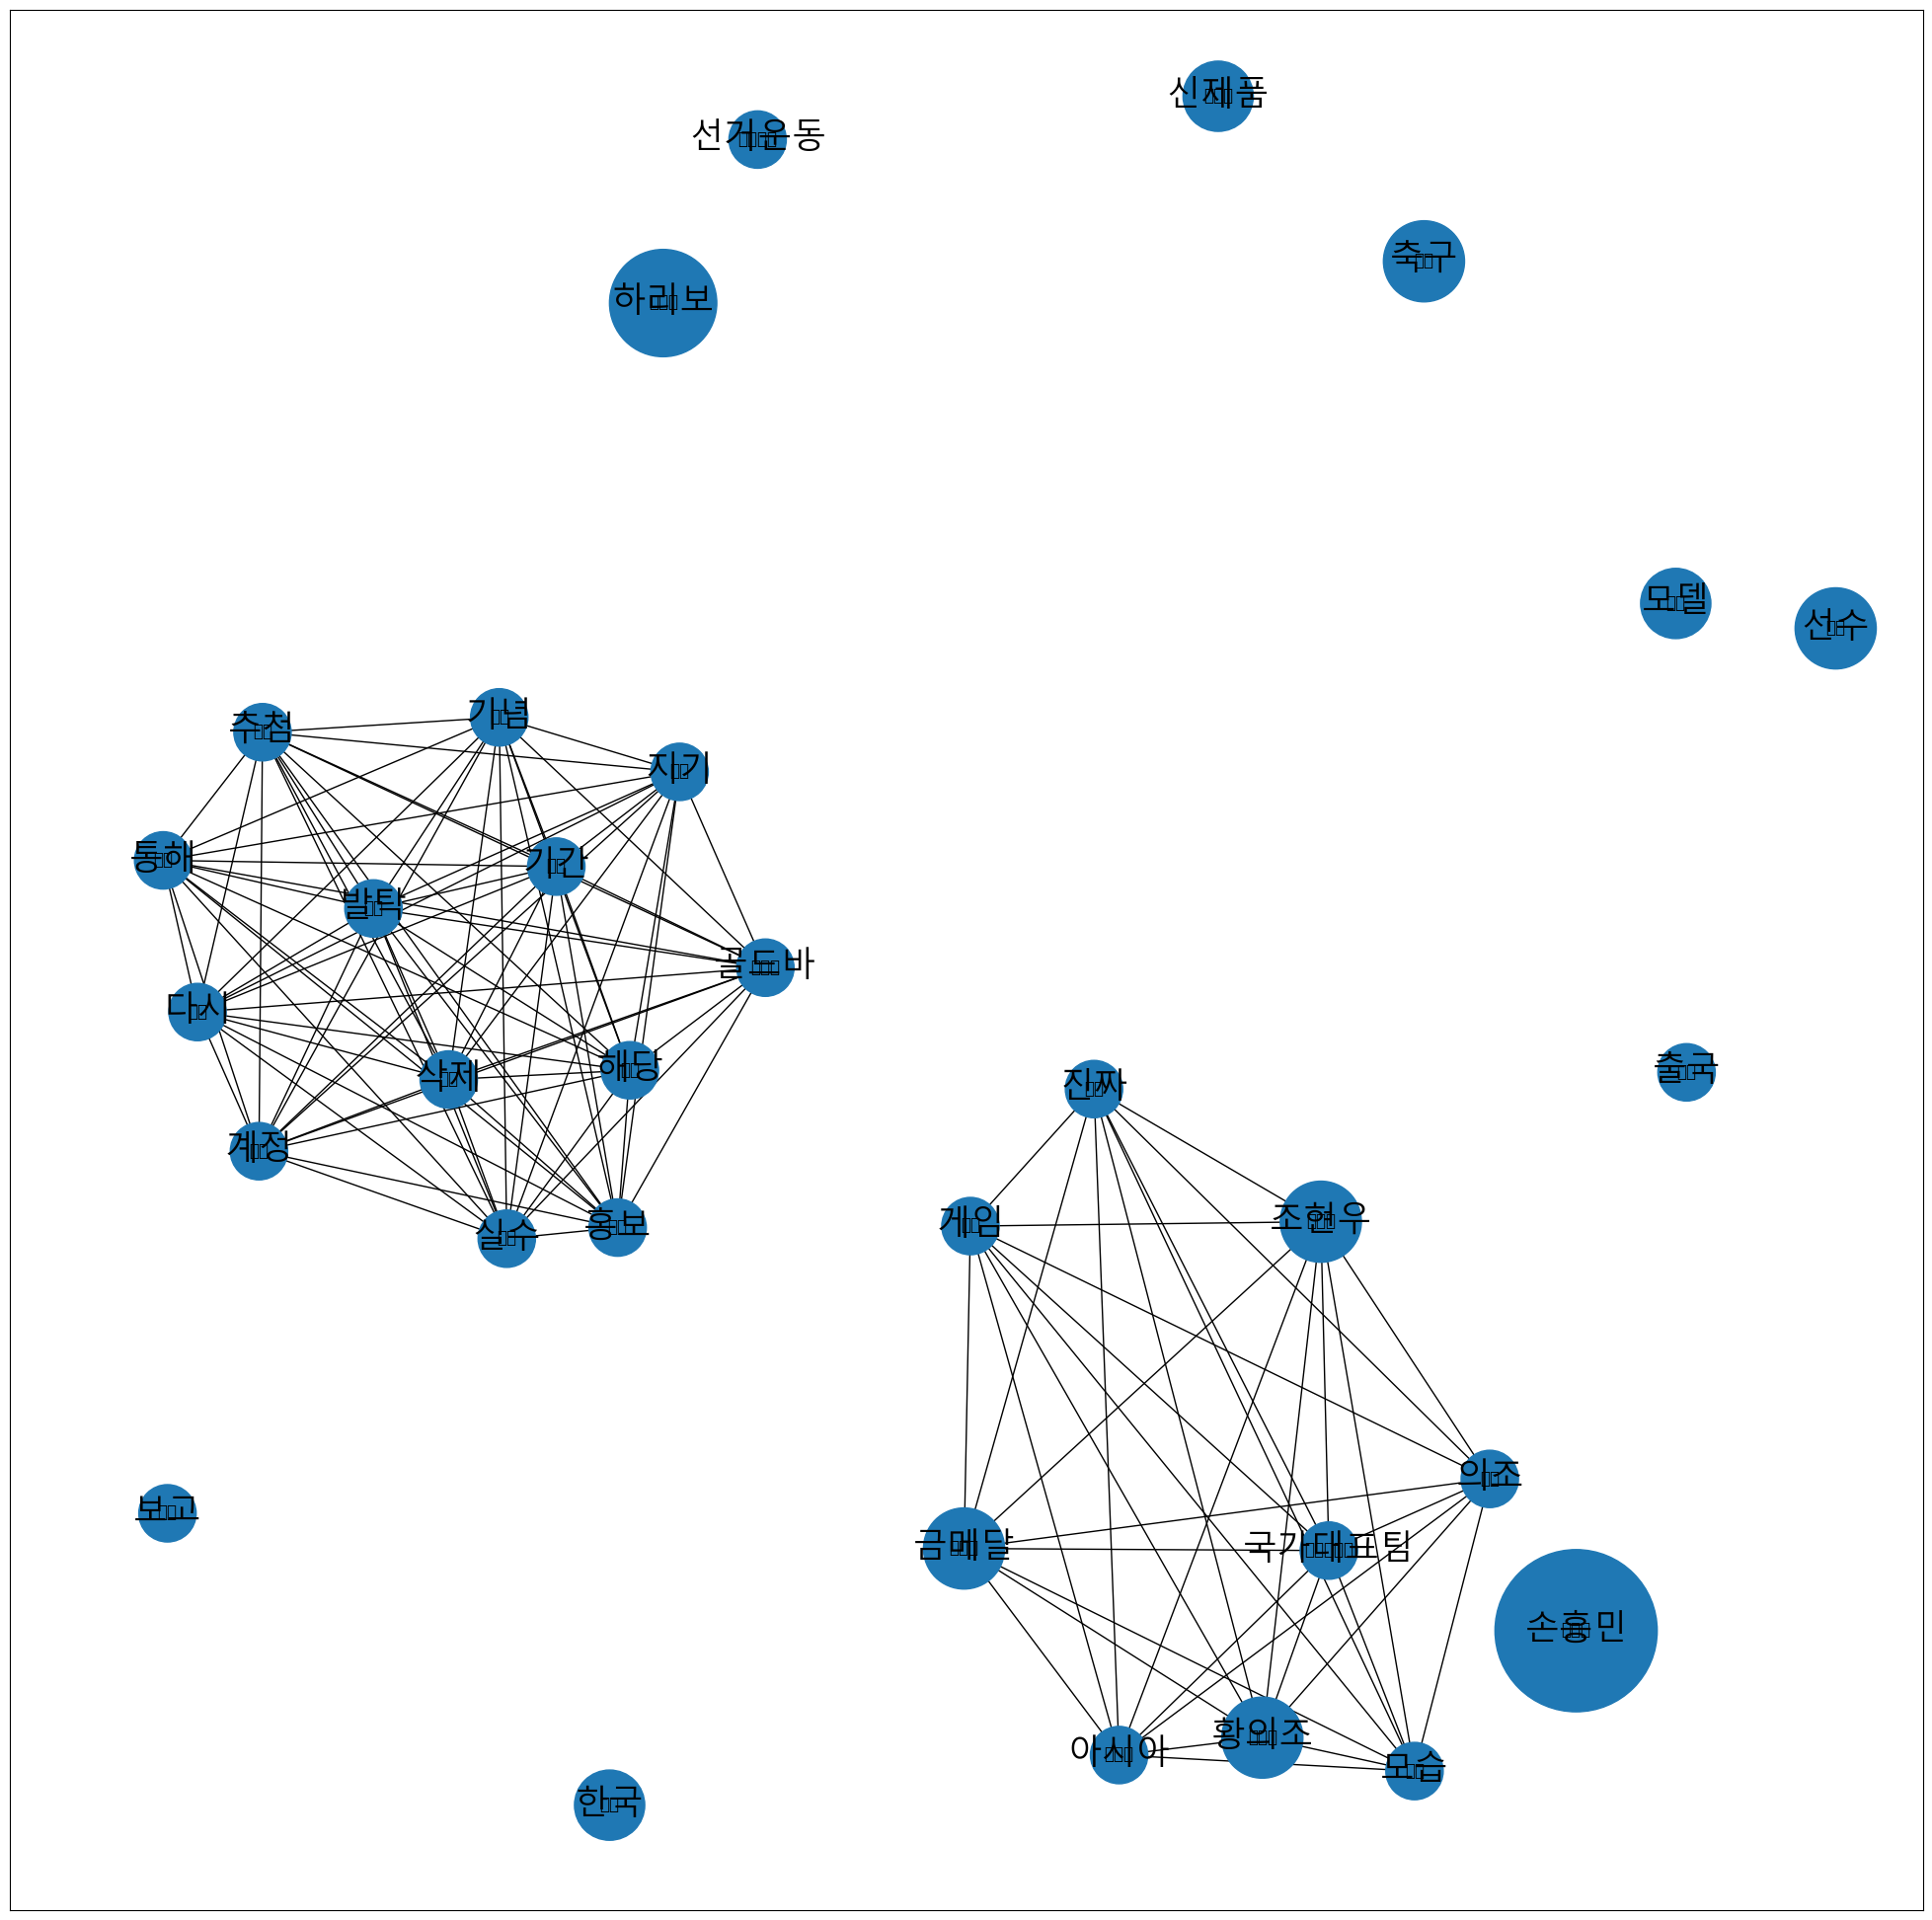

In [93]:
import networkx as nx
plt.figure(figsize=(25,25))
# networkx 그래프 객체를 생성합니다.
G = nx.Graph()

# 노드 생성
for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
# 노드 사이의 간선을 생성
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])

pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw_networkx(G, pos=pos, node_size=sizes)

# 한글이 있는 경우 폰트 설정 - MAC 은 AppleGothic, Windows 는 Malgun Gothic
nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)
# 그래프를 출력
ax = plt.gca()
plt.show()

In [95]:
from collections import deque
li = deque([1,2,3,4])
li.popleft()

1

## 콘텐츠 기반의 영화 추천 서비스

In [10]:
movies =pd.read_csv('./data/tmdb/tmdb_5000_movies.csv')
print(movies.shape)
movies.info()

(4803, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status    

### 필요한 피처만 추출

In [6]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                    'popularity', 'keywords', 'overview']]
print(movies_df[['genres','keywords']][:1])

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords  
0  [{"id": 1463, "name": "culture clash"}, {"id":...  


In [11]:
# 장르와 키워드는 문자열인데 포멧이 python 의 list
# 이 때 사용하는 함수는 eval 이나 ast 패키지의 literal_eval 함수

from ast import literal_eval
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

# genres 와 keywords 에서 dict 에서 name 에 해당하는 값만 추출해서 list로 추출
movies_df['genres'] = movies_df['genres'].apply(lambda x : [y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [y['name'] for y in x])

movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon..."


In [13]:
# 장르별 유사도 측정을 위해서 장르를 피처 벡터 행렬로 생성
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백 문자로 word 단위가 구분되는 문자열로 변환.
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0.0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


In [12]:
movies_df['genres'].apply(lambda x : (' ').join(x))

0       Action Adventure Fantasy Science Fiction
1                       Adventure Fantasy Action
2                         Action Adventure Crime
3                    Action Crime Drama Thriller
4               Action Adventure Science Fiction
                          ...                   
4798                       Action Crime Thriller
4799                              Comedy Romance
4800               Comedy Drama Romance TV Movie
4801                                            
4802                                 Documentary
Name: genres, Length: 4803, dtype: object

In [14]:
# 코사인 유사도 측정
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


In [15]:
# 유사도 정렬
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

# 여기서 출력되는 값은 유사도가 높은 행의 인덱스

[[   0 3494  813 ... 3038 3037 2401]]


In [18]:
# 장르의 유사도를 이용한 영화 추천 함수
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    # 제목을 가지고 영화 찾기
    title_movie = df[df['title'] == title_name]
    # 영화의 인덱스 찾기
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    # 유사도 행렬 찾기
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1) # flatten 도 가능
    return df.iloc[similar_indexes]

In [22]:
# 영화 추천
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'El Mariachi',10)
similar_movies[['title', 'vote_average']]

[[2111 3972 1860 1930 2229 3591  963 1653 1133 3306]]


,title,vote_average
2111,The French Connection,7.4
3972,Chicago Overcoat,6.1
1860,Kiss of the Dragon,6.4
1930,Stone Cold,5.7
2229,Machete Kills,5.3
3591,Nighthawks,6.4
963,Ninja Assassin,6.2
1653,The Last Stand,5.7
1133,15 Minutes,5.7
3306,Code of Honor,4.1


In [23]:
# 영화의 평점을 내림차순으로 정렬해서 10개 확인
movies_df[['title','vote_average','vote_count']].sort_values('vote_average', ascending=False)[:10]


,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


v : 개별 영화에 평점을 투표한 횟수  
m : 평점을 부여하기 위한 최소 투표 횟수  
R : 개별 영화에 평균 평점  
C : 전체 영화에 대한 평균 평점  

In [24]:
# 가중 평점 구하기
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C:',round(C,3), 'm:',round(m,3))

C: 6.092 m: 370.2


In [25]:
# 가중 평점 계산
def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C ) 

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [26]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    # 제목을 가지고 영화 찾기
    title_movie = df[df['title'] == title_name]
    # 영화의 인덱스 찾기
    title_index = title_movie.index.values

    # 유사도 행렬 찾아오기
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
    # 현재 영화는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

In [28]:
# 영화 추천
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',15)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
1881,The Shawshank Redemption,8.5,8.396052
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
3887,Trainspotting,7.8,7.591009
883,Catch Me If You Can,7.7,7.557097
892,Casino,7.8,7.423040
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664


### 아이템 기반 개인화된 영화 추천

#### 데이터 가져오기

In [32]:
movies = pd.read_csv('./data/movielens/movies.csv')
ratings = pd.read_csv('./data/movielens/ratings.csv')
print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [34]:
# 영화 정보 확인
# 각 피처의 자료형과 결측값 여부 등 확인
movies.info()
ratings.info()
# 일반적으로 각 피처의 unique 를 출력 - 범주형인지 확인, 범주형인 경우 순서가 있는지 확인
# kaggle 이나 Dacon 경진대회는 피처 이름을 잘 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [40]:
# ratings 수정
ratings = ratings[['userId', 'movieId', 'rating']]
print(ratings)

        userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]


In [41]:
# 개인화된 최근접 이웃 추천 알고리즘을 구현할 때는 
# 개인을 인덱스로 놓고 아이템을 피처의 형태로 만들어야 함
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# movieId 를 영화 제목으로 변경
# ratings 와 movies 를 합치기
rating_movies = pd.merge(ratings, movies, on='movieId')
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
print(ratings_matrix.head())

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             Na

In [46]:
# NaN 값을 모두 0 으로 변환
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#영화 간 유사도 산출 - 유사도를 계산할 항목이 인덱스
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head(3)

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
#영화를 기준으로 코사인 유사도 산출
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
# cosine_similarity() 로 반환된 넘파이 행렬을 영화명을 매핑하여 DataFrame으로 변환
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns,columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.0,0.0,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [54]:
# 영화를 가지고 유사도가 가장 높은 영화를 추천
# 자기 자신과 유사도를 계산하면 1
# 추천을 할 때는 자신을 제외하고 추천
item_sim_df["Inception (2010)"].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

In [55]:
def predict_rating(ratings_arr, item_sim_arr ):
    ratings_pred = ratings_arr.dot(item_sim_arr) / np.array([np.abs(item_sim_arr).sum(axis=1)])
    return ratings_pred

ratings_pred = predict_rating(ratings_matrix.values , item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index, columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,...,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,...,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,...,0.006923,0.011665,0.011800,0.012225,0.000000,0.008194,0.007017,0.009229,0.010420,0.084501


In [58]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)
# MSE 는 오차를 제곱한 값
print('MSE:', get_mse(ratings_pred, ratings_matrix.values ))

MSE: 9.895354759094706


In [60]:
# 유사도가 높은 영화만을 가지고 예측을 수행하는 함수
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):

    pred = np.zeros(ratings_arr.shape)

    for col in range(ratings_arr.shape[1]):

        top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]

        for row in range(ratings_arr.shape[0]):
            pred[row, col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items].T)
            pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
    return pred

In [61]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))

아이템 기반 인접 TOP-20 이웃 MSE:  3.695009387428144


In [66]:
# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index, columns = ratings_matrix.columns)

# 유저 정보를 가지고 추천
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]

title
Adaptation (2002)                                                                 5.0
Citizen Kane (1941)                                                               5.0
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    5.0
Producers, The (1968)                                                             5.0
Lord of the Rings: The Two Towers, The (2002)                                     5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)                         5.0
Back to the Future (1985)                                                         5.0
Austin Powers in Goldmember (2002)                                                5.0
Minority Report (2002)                                                            4.0
Witness (1985)                                                                    4.0
Name: 9, dtype: float64

In [63]:
# 유저가 보지 않은 영화 리스트를 생성해주는 함수
def get_unseen_movies(ratings_matrix, userId):
    user_rating = ratings_matrix.loc[userId,:]
    # 평점이 0 이상인 데이터는 이미 본 영화
    already_seen = user_rating[ user_rating > 0].index.tolist()
    movies_list = ratings_matrix.columns.tolist()  
    unseen_list = [movie for movie in movies_list if movie not in already_seen]
    return unseen_list

In [62]:
# 유저가 보지 않은 영화 중에서 예측 평점이 높은 영화를 추천해주는 함수
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies


In [64]:
# 사용자가 보지 않은 영화
unseen_list = get_unseen_movies(ratings_matrix, 9)

In [65]:
# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)
# 평점 데이타를 DataFrame으로 생성.
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


### 행렬 분해

In [71]:
from numpy.linalg import svd
A = np.array([[3, -1], [1, 3], [1, 1]])
U, S, VT = svd(A)
print(U)
print(S)
print(VT)

U @ np.diag(S, 1)[:, 1:] @ VT

[[-4.08248290e-01  8.94427191e-01 -1.82574186e-01]
 [-8.16496581e-01 -4.47213595e-01 -3.65148372e-01]
 [-4.08248290e-01 -1.94289029e-16  9.12870929e-01]]
[3.46410162 3.16227766]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


array([[ 3., -1.],
       [ 1.,  3.],
       [ 1.,  1.]])

### 행렬 분해를 이용한 잠재 요인 협업 추천 알고리즘 구현

#### 평가 지표를 계산해주는 함수

mean_squared_error 를 제공하는데 rmse 를 사용하기 위해  
영화의 평점은 대부분 0.0 ~ 5.0 또는 10.0 인데 mse 를 사용하면 스케일이 커짐

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# 원래 데이터를 행렬 분해한 데이터를 복원한 데이터와 비교해서 차이를 구해주는 함수
# P, Q가 행렬 분해된 데이터, non_zeros 는 0이 아닌 데이터의 인덱스
def get_rmse(R, P, Q, non_zeros):
    error = 0
    # T 속성은 행렬의 전치
    full_pred_matrix = np.dot(P, Q.T)

    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    return rmse


In [ ]:
# 행렬 분해 함수 - 실제 딥러닝 모델에서 이미 구현이 되어있음
def matrix_factorization(R, K, steps=200, learning_rate=0.01, r_lambda = 0.01):
    num_users, num_items = R.shape
    # P와 Q 매트릭스의 크기를 지정하고 정규분포를 가진 랜덤한 값으로 입력합니다.
    np.random.seed(42)
    P = np.random.normal(scale=1./K, size=(num_users, K))
    Q = np.random.normal(scale=1./K, size=(num_items, K))

    # 중간에 멈춘 개수 파악
    break_count = 0
    
    # 행렬에서 값이 0이 아닌 인덱스의 리스트를 생성
    non_zeros = [(i, j, R[i,j]) 
                 for i in range(num_users) 
                 for j in range(num_items) if R[i,j] > 0 ]

    for step in range(steps):
        for i, j, r in non_zeros:
            # 실제 값과 예측 값의 차이인 오류 값 구함
            eij = r - np.dot(P[i, :], Q[j, :].T)
            # Regularization을 반영한 SGD 업데이트 공식 적용
            P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
            Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 10) == 0 :
            print("### iteration step : ", step," rmse : ", rmse)
    return P, Q